In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/medical_appointment_dataset.csv")
print(df.shape)
print(df.columns)
df.head()

(110527, 14)
Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [55]:
# Cleaning and organize dataset
df = df.drop("Neighbourhood", axis=1)
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No


In [56]:
# creating some useful columns
df["scheduled_day"] = df["ScheduledDay"].dt.dayofweek
df["appointment_day"] = df["AppointmentDay"].dt.dayofweek
df["days_waited"] = (df["AppointmentDay"] - df["ScheduledDay"]).dt.days + 1
df["same_day"] = (df["days_waited"] == 0).astype(int)
print(df)

           PatientId  AppointmentID Gender              ScheduledDay  \
0       2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1       5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2       4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3       8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4       8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   
...              ...            ...    ...                       ...   
110522  2.572134e+12        5651768      F 2016-05-03 09:15:35+00:00   
110523  3.596266e+12        5650093      F 2016-05-03 07:27:33+00:00   
110524  1.557663e+13        5630692      F 2016-04-27 16:03:52+00:00   
110525  9.213493e+13        5630323      F 2016-04-27 15:09:23+00:00   
110526  3.775115e+14        5629448      F 2016-04-27 13:30:56+00:00   

                  AppointmentDay  Age  Scholarship  Hipertension  Diabetes  \
0      2016-04-29 00:00:00+00:00   62            0       

In [57]:
# Check missing values or imbalances
print(df.isnull().sum())
print(df["No-show"].value_counts())

PatientId          0
AppointmentID      0
Gender             0
ScheduledDay       0
AppointmentDay     0
Age                0
Scholarship        0
Hipertension       0
Diabetes           0
Alcoholism         0
Handcap            0
SMS_received       0
No-show            0
scheduled_day      0
appointment_day    0
days_waited        0
same_day           0
dtype: int64
No-show
No     88208
Yes    22319
Name: count, dtype: int64


In [58]:
df.rename(columns={
    'No-show': 'no_show',
    'PatientId': 'patient_id',
    'AppointmentID': 'appointment_id',
    'ScheduledDay': 'scheduled_day',
    'AppointmentDay': 'appointment_day',
    'Hipertension': 'hypertension',
    'Handcap': 'handicap',
    'SMS_received': 'sms_received'
}, inplace=True)


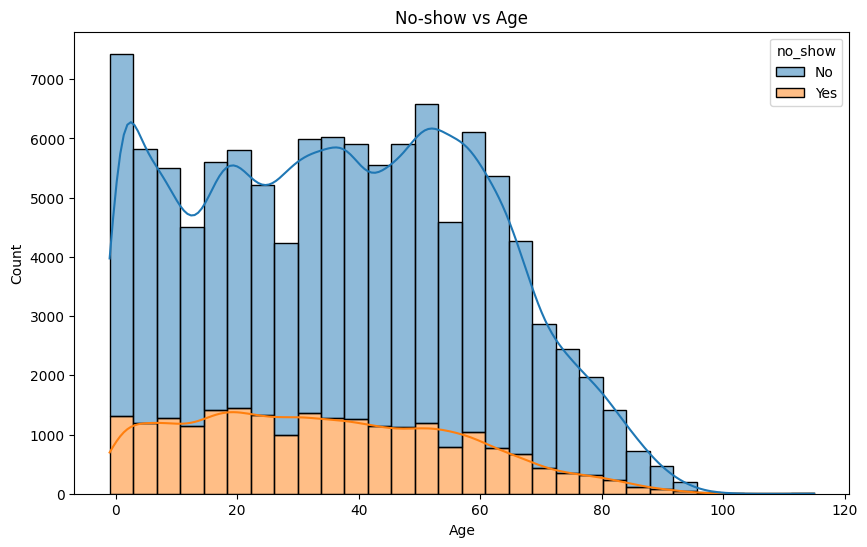

In [59]:
# Effect of age on no-show
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue="no_show", bins=30, kde=True, multiple="stack")
plt.title("No-show vs Age")
plt.show()



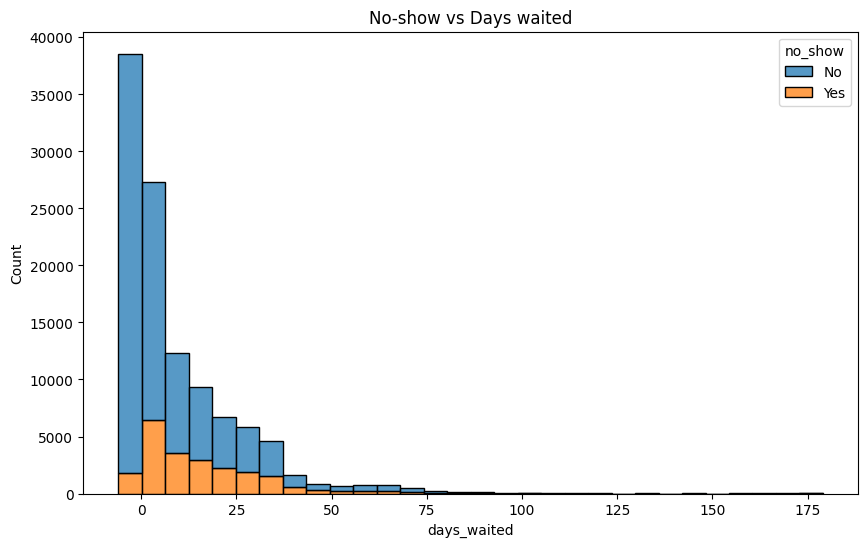

In [60]:
# Effect of wait time on no-shows
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="days_waited", hue="no_show", bins=30, multiple="stack")
plt.title("No-show vs Days waited")
plt.show()

In [ ]:
# Basic AI model to predict whether someone will miss the appointment

df["no_show"] = df["no_show"].map({"No": 0, "Yes": 1})
features = ["Age", "hypertension", "diabetes", "alcoholism", "handicap", "sms_received", "days_waited",
             "scheduled_day", "appointment_day", "scheduled_hour", "same_day"]

x = df[features]
y = df["no_show"]
